# Predicting Future of Used Cars

## Preparing for tools

Libraries required for Data manuplation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data...

In [2]:
df = pd.read_csv('OLX_Car_Data_CSV.csv', encoding='ISO-8859-1')

## Exploration data Analysis (EDA)

The goal here is to become subject matter export.

1. Ask questions what problem are we trying to solve?
2. How are we going to fill the missing values?
3. What kind of data is available and how will we deal with it?
4. Are there any outliers and how are we going to deal with them?
5. Is there a need to add more features or remove them to add value to the data?

In [3]:
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [4]:
df.shape

(24973, 9)

In [5]:
df.isna().sum()

Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64

In [6]:
df.describe()

,KMs Driven,Price,Year
count,2.268700e+04,2.497300e+04,22689.000000
mean,1.278112e+05,9.128953e+05,2005.901626
std,5.996726e+05,1.537134e+06,9.563804
min,1.000000e+00,5.000000e+04,1915.000000
25%,1.600000e+04,3.800000e+05,2002.000000
50%,6.651000e+04,6.500000e+05,2008.000000
75%,1.000000e+05,1.145000e+06,2013.000000
max,1.000000e+07,8.765432e+07,2020.000000


In [15]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Brand
False    22836
True      2137
Name: Brand, dtype: int64

Condition
False    22837
True      2136
Name: Condition, dtype: int64

Fuel
False    22528
True      2445
Name: Fuel, dtype: int64

KMs Driven
False    24973
Name: KMs Driven, dtype: int64

Model
False    22525
True      2448
Name: Model, dtype: int64

Price
False    24973
Name: Price, dtype: int64

Registered City
False    20337
True      4636
Name: Registered City, dtype: int64

Transaction Type
False    22528
True      2445
Name: Transaction Type, dtype: int64

Year
False    24973
Name: Year, dtype: int64



In [8]:
df

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0
...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0
24969,Daihatsu,New,Petrol,10000.0,Cuore,390000,Karachi,Cash,2004.0
24970,Other Brands,Used,CNG,158715.0,Other,180000,NaN,Cash,2000.0
24971,Suzuki,Used,Petrol,1.0,Alto,470000,Rawalpindi,Cash,2003.0


In [12]:
Km_avg = df['KMs Driven'].astype('float').mean(axis=0) 
df['KMs Driven'].fillna(Km_avg, inplace=True)
print(Km_avg)

127811.16282452505


In [14]:
Year_avg = df['Year'].astype('float').mean(axis=0)
df['Year'].fillna(Year_avg, inplace=True)
print(Year_avg)

2005.901626338754


In [16]:
df.dropna(subset=['Brand','Condition','Fuel','Model','Registered City','Transaction Type'], axis=0, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20334 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             20334 non-null  object 
 1   Condition         20334 non-null  object 
 2   Fuel              20334 non-null  object 
 3   KMs Driven        20334 non-null  float64
 4   Model             20334 non-null  object 
 5   Price             20334 non-null  int64  
 6   Registered City   20334 non-null  object 
 7   Transaction Type  20334 non-null  object 
 8   Year              20334 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.6+ MB


## Visuallization

In [18]:
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


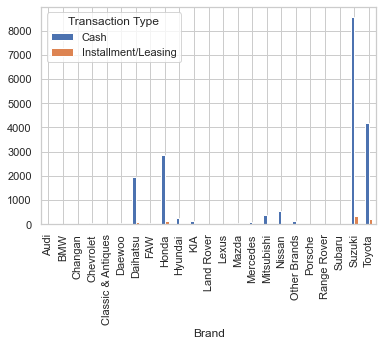

In [67]:
pd.crosstab(df['Brand'], df['Transaction Type']).plot(kind='bar');